In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
import numpy as np
import pandas as pd
from sklego.datasets import load_penguins

df = load_penguins(as_frame=True).dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [17]:
from hulearn.experimental.interactive import InteractiveClassifierCharts

In [18]:
clf = InteractiveClassifierCharts(df, labels="species")

Loading BokehJS ...

In [23]:
clf.add_chart(x="bill_length_mm", y="bill_depth_mm")

In [8]:
clf.add_chart(x="flipper_length_mm", y="body_mass_g")

In [9]:
import json 
import pathlib 

demo_data = clf.data()
pathlib.Path("demo_data.json").write_text(json.dumps(demo_data))

2075

In [10]:
# data_in = {'bill_length_mm': 50.7, 'bill_depth_mm': 14.0, 'flipper_length_mm': 220.16, 'body_mass_g': 5500}
data = json.loads(pathlib.Path("demo_data.json").read_text())
# data

In [11]:
data

[{'chart_id': 'f0cd183c-1',
  'x': 'bill_length_mm',
  'y': 'bill_depth_mm',
  'polygons': {'Adelie': {'bill_length_mm': [[31.70418915059525,
      33.16508967050232,
      38.574941976669834,
      48.41909945182711,
      48.41909945182711,
      38.574941976669834]],
    'bill_depth_mm': [[15.433413712074017,
      20.37203440172919,
      22.060400930586315,
      21.84849161215868,
      18.08151884968909,
      15.475793329785313]]},
   'Gentoo': {'bill_length_mm': [[58.04898697500981,
      51.96654358701892,
      42.654502732140415,
      39.2844308037082,
      42.87246245863649,
      48.34504093166947,
      60.76060180403499]],
    'bill_depth_mm': [[18.081857620237592,
      17.911580228825798,
      16.268840227147333,
      13.889699535061276,
      12.65148621276582,
      12.940845990562435,
      17.026048319291068]]},
   'Chinstrap': {'bill_length_mm': [[42.47713052538082,
      39.639175217227375,
      46.37931907409181,
      54.71581279179257,
      57.731140306

In [12]:
from hulearn.experimental.interactive import HumanClassifier

HumanClassifier(json_desc=data)

In [13]:
X, y = df.drop(columns=['species']), df['species']

preds = HumanClassifier(json_desc=data).fit(X, y).predict_proba(X)
preds[:5]

array([[6.66333666e-01, 3.33000333e-04, 3.33333333e-01],
       [6.66333666e-01, 3.33000333e-04, 3.33333333e-01],
       [6.66333666e-01, 3.33000333e-04, 3.33333333e-01],
       [6.66333666e-01, 3.33000333e-04, 3.33333333e-01],
       [6.66333666e-01, 3.33000333e-04, 3.33333333e-01]])

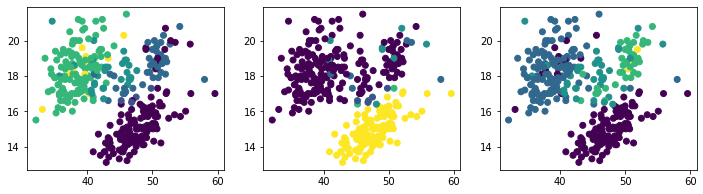

In [14]:
import matplotlib.pylab as plt 

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=preds[:, 0])
plt.subplot(132)
plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=preds[:, 1])
plt.subplot(133)
plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=preds[:, 2])

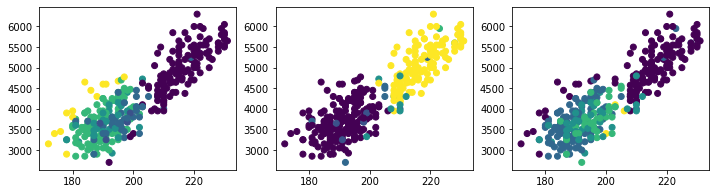

In [15]:
import matplotlib.pylab as plt 

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.scatter(X['flipper_length_mm'], X['body_mass_g'], c=preds[:, 0])
plt.subplot(132)
plt.scatter(X['flipper_length_mm'], X['body_mass_g'], c=preds[:, 1])
plt.subplot(133)
plt.scatter(X['flipper_length_mm'], X['body_mass_g'], c=preds[:, 2])